In [168]:
import tensorflow as tf
import os
from os import listdir
from os.path import isfile, join
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D

In [185]:
img_width = 150
img_height = 150

train_data_dir = 'ML/compVsLaptop/images/training'
validation_data_dir = 'ML/compVsLaptop/images/validation'
train_samples = 120
validation_samples = 30
epochs = 5
batch_size = 20
data_gen = ImageDataGenerator(rescale=1. / 255)
valida_data_gen = ImageDataGenerator(rescale=1. / 255)

In [186]:
train_data_gen  = data_gen.flow_from_directory(
train_data_dir, batch_size=10,target_size=(150, 150),class_mode='binary')

Found 341 images belonging to 2 classes.


In [187]:
validation_data  =  valida_data_gen.flow_from_directory(
validation_data_dir, batch_size=10,target_size=(150, 150),class_mode='binary')
validation_data.class_indices

Found 91 images belonging to 2 classes.


{'Cat': 0, 'Dog': 1}

In [222]:
model = Sequential()
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [223]:
history = model.fit_generator(train_data_gen, steps_per_epoch=len(train_data_gen),
	validation_data=validation_data, validation_steps=len(validation_data), epochs=20, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 10 steps
Epoch 1/20
35/35 [==============================] - 18s 501ms/step - loss: 0.8946 - accuracy: 0.4897 - val_loss: 0.7079 - val_accuracy: 0.5165
Epoch 2/20
35/35 [==============================] - 16s 455ms/step - loss: 0.6931 - accuracy: 0.5308 - val_loss: 0.6989 - val_accuracy: 0.4396
Epoch 3/20
35/35 [==============================] - 15s 441ms/step - loss: 0.6746 - accuracy: 0.5924 - val_loss: 0.6937 - val_accuracy: 0.4286
Epoch 4/20
35/35 [==============================] - 16s 464ms/step - loss: 0.6467 - accuracy: 0.6569 - val_loss: 0.7381 - val_accuracy: 0.5385
Epoch 5/20
35/35 [==============================] - 16s 459ms/step - loss: 0.6421 - accuracy: 0.5924 - val_loss: 0.7107 - val_accuracy: 0.4725
Epoch 6/20
35/35 [==============================] - 16s 463ms/step - loss: 0.6189 - accuracy: 0.6422 - val_loss: 0.6863 - val_accuracy: 0.4615
Epoch 7/20
35/35 [==============================] 

In [136]:
# history.history

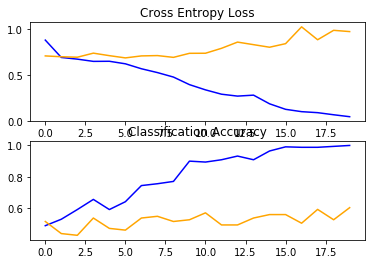

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
pyplot.show()

pyplot.close()


In [238]:
from os import listdir, getcwd
from os.path import isfile, join
print(getcwd())

/Users/ashutoshjha/Desktop/Projects/ML-DL


In [246]:
predict_dir_path=getcwd() + '/ML/compVsLaptop/images/test'
listdir(predict_dir_path)
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)


['cat 1.104.jpg', 'cat 1.110.jpg', 'cat 1.111.jpg', 'cat 1.105.png', 'dog.21.jpg', 'cat 1.93.png?w=600&fl=progressive&auto=format,compress&cs=tinysrgb&dpr=1', 'cat 1.102.png', 'cat.0.jpg', 'cat 1.116.jpg', 'cat.1.jpg', 'cat 1.117.png', 'cat 1.115.jpg', 'cat 1.114.jpg', 'cat 1.103.jpeg', 'cat 1.96.jpg', 'cat 1.92.jpg', 'cat 1.91.jpg', 'dog.5.jpg', 'cat 1.90.jpg', 'dog.9.jpg', 'dogs.64.jpg', 'dogs.61.jpg', 'dogs.63.jpg', 'cat 1.98.jpg', 'cat 1.99.jpg', 'dogs.62.jpg', 'dog.16.jpg', 'cat 1.97.jpeg', 'dog.15.jpg', 'dog.10.jpg', 'cat 1.108.jpg', 'cat 1.109.jpg']


In [247]:
import numpy as np
from tensorflow.keras.preprocessing import image
dog_counter = 0 
cat_counter  = 0

predict_dir_path=getcwd() + '/ML/compVsLaptop/images/test/'
print(listdir(predict_dir_path))
for file in onlyfiles:
    img = image.load_img(predict_dir_path +file, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'cat')
        cat_counter += 1
    else:
        print(file + ": " + 'dog')
        dog_counter += 1
print("Total Dogs :",dog_counter)
print("Total Cats :",cat_counter)

['cat 1.104.jpg', 'cat 1.110.jpg', 'cat 1.111.jpg', 'cat 1.105.png', 'dog.21.jpg', 'cat 1.93.png?w=600&fl=progressive&auto=format,compress&cs=tinysrgb&dpr=1', 'cat 1.102.png', 'cat.0.jpg', 'cat 1.116.jpg', 'cat.1.jpg', 'cat 1.117.png', 'cat 1.115.jpg', 'cat 1.114.jpg', 'cat 1.103.jpeg', 'cat 1.96.jpg', 'cat 1.92.jpg', 'cat 1.91.jpg', 'dog.5.jpg', 'cat 1.90.jpg', 'dog.9.jpg', 'dogs.64.jpg', 'dogs.61.jpg', 'dogs.63.jpg', 'cat 1.98.jpg', 'cat 1.99.jpg', 'dogs.62.jpg', 'dog.16.jpg', 'cat 1.97.jpeg', 'dog.15.jpg', 'dog.10.jpg', 'cat 1.108.jpg', 'cat 1.109.jpg']
cat 1.104.jpg: cat
cat 1.110.jpg: cat
cat 1.111.jpg: cat
cat 1.105.png: cat
dog.21.jpg: dog
cat 1.93.png?w=600&fl=progressive&auto=format,compress&cs=tinysrgb&dpr=1: dog
cat 1.102.png: cat
cat.0.jpg: dog
cat 1.116.jpg: cat
cat.1.jpg: cat
cat 1.117.png: cat
cat 1.115.jpg: cat
cat 1.114.jpg: cat
cat 1.103.jpeg: cat
cat 1.96.jpg: cat
cat 1.92.jpg: cat
cat 1.91.jpg: cat
dog.5.jpg: dog
cat 1.90.jpg: cat
dog.9.jpg: cat
dogs.64.jpg: dog
dog

SyntaxError: invalid syntax (<ipython-input-232-42381c771654>, line 4)